In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"C:\Users\palla\OneDrive\Desktop\academic\ML\healthmonitoring.csv")

In [3]:
df.head()

,PatientID,Age,Gender,HeartRate,BloodPressure,RespiratoryRate,BodyTemperature,ActivityLevel,OxygenSaturation,SleepQuality,StressLevel,Timestamp
0,1,69,Male,60.993428,130/85,15,98.885236,resting,95.0,excellent,low,28:55.3
1,2,32,Male,98.723471,120/80,23,98.281883,walking,97.0,good,high,23:55.3
2,3,78,Female,82.295377,130/85,13,98.820286,resting,45.0,fair,high,18:55.3
3,4,38,Female,80.000000,111/78,67,98.412594,running,98.0,poor,moderate,13:55.3
4,5,41,Male,87.531693,120/80,14,99.369871,resting,68.0,good,low,08:55.3


In [4]:
df.shape

(500, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         500 non-null    int64  
 1   Age               500 non-null    int64  
 2   Gender            500 non-null    object 
 3   HeartRate         500 non-null    float64
 4   BloodPressure     500 non-null    object 
 5   RespiratoryRate   500 non-null    int64  
 6   BodyTemperature   482 non-null    float64
 7   ActivityLevel     500 non-null    object 
 8   OxygenSaturation  340 non-null    float64
 9   SleepQuality      500 non-null    object 
 10  StressLevel       500 non-null    object 
 11  Timestamp         500 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 47.0+ KB


In [6]:
df.nunique()

PatientID           500
Age                  67
Gender                2
HeartRate           332
BloodPressure       139
RespiratoryRate      17
BodyTemperature     482
ActivityLevel         3
OxygenSaturation     11
SleepQuality          4
StressLevel           3
Timestamp            12
dtype: int64

In [7]:
df.describe()

,PatientID,Age,HeartRate,RespiratoryRate,BodyTemperature,OxygenSaturation
count,500.000000,500.000000,500.000000,500.000000,482.000000,340.000000
mean,250.500000,51.146000,80.131613,17.962000,98.583458,95.947059
std,144.481833,19.821566,9.606273,5.732913,0.470033,4.448674
min,1.000000,18.000000,60.169259,12.000000,97.094895,45.000000
25%,125.750000,34.000000,75.000000,15.000000,98.274100,95.000000
50%,250.500000,51.000000,80.000000,18.000000,98.609167,96.000000
75%,375.250000,69.000000,86.276413,20.000000,98.938284,98.000000
max,500.000000,84.000000,99.925508,78.000000,99.489150,99.000000


In [8]:
df.isnull().sum()

PatientID             0
Age                   0
Gender                0
HeartRate             0
BloodPressure         0
RespiratoryRate       0
BodyTemperature      18
ActivityLevel         0
OxygenSaturation    160
SleepQuality          0
StressLevel           0
Timestamp             0
dtype: int64

In [9]:
bp = df['BloodPressure'].str.split('/', expand=True)
print(bp)
df['SystolicBP'], df['DiastolicBP'] = pd.to_numeric(bp[0]), pd.to_numeric(bp[1])


       0   1
0    130  85
1    120  80
2    130  85
3    111  78
4    120  80
..   ...  ..
495  135  76
496  130  85
497  120  80
498  130  85
499  130  85

[500 rows x 2 columns]


In [10]:
df.drop(['BloodPressure', 'PatientID', 'Timestamp'], axis=1, inplace=True)

In [11]:
df.fillna(df.mode().iloc[0], inplace=True)

In [12]:
df.isnull().sum()

Age                 0
Gender              0
HeartRate           0
RespiratoryRate     0
BodyTemperature     0
ActivityLevel       0
OxygenSaturation    0
SleepQuality        0
StressLevel         0
SystolicBP          0
DiastolicBP         0
dtype: int64

In [13]:
df['HealthStatus'] = ((df['OxygenSaturation'] < 95) | (df['HeartRate'] > 100) |  (df['BodyTemperature'] > 100)).astype(int)

In [14]:
for col in ['Gender', 'ActivityLevel', 'SleepQuality', 'StressLevel']:
    df[col] = LabelEncoder().fit_transform(df[col])


In [15]:
X = df.drop('HealthStatus', axis=1)
y = df['HealthStatus']



In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)


In [17]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_s, y_train)


RandomForestClassifier(random_state=42)

In [18]:
y_pred_rf = rf_model.predict(X_test_s)

print("\nRandom Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))



Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        47

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



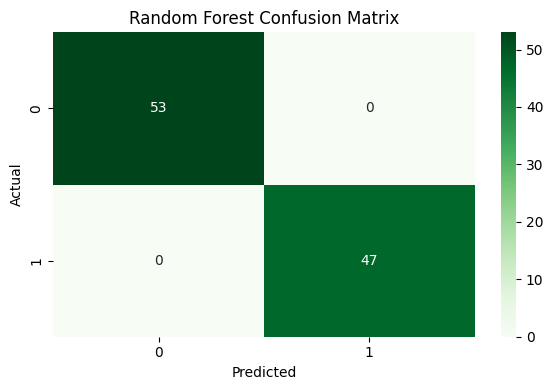

In [19]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
